In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

## Importing the U.S. Impressions Dataset

In [3]:
impressions_path = '/content/drive/MyDrive/Kinesso/US EDA/US Data Sources/impression_dataframes/impressions_'

In [4]:
# reads the U.S. advertisement impression dataset into the DataFrame "impressions" by iteratively concatenating files in groups of 25
impressions = pd.read_pickle(impressions_path + "0.pkl")
for i in range(16):
  start = (25 * i) + 1
  stop = start + 25
  df_list = [pd.read_pickle(impressions_path + str(j) + ".pkl") for j in range(start, stop)]
  df_concat = pd.concat(df_list)
  impressions = pd.concat([impressions, df_concat])
  del df_list
  del df_concat

In [5]:
impressions.shape

(20050000, 20)

In [6]:
impressions.columns

Index(['impression_id', 'campaign_id', 'ad_group_id', 'audience_id',
       'supply_vendor', 'user_agent', 'region', 'city', 'device_type',
       'os_family', 'os', 'browser', 'media_cost', 'ttd_cost_in_usd',
       'partner_cost_in_usd', 'advertiser_cost_in_usd', 'zip_code',
       'device_make', 'device_model', 'carrier_id'],
      dtype='object')

## Data Cleaning

In [7]:
impressions.dropna(subset=['zip_code'], inplace=True)
impressions.reset_index(drop=True, inplace=True)
impressions.head()

,impression_id,campaign_id,ad_group_id,audience_id,supply_vendor,user_agent,region,city,device_type,os_family,os,browser,media_cost,ttd_cost_in_usd,partner_cost_in_usd,advertiser_cost_in_usd,zip_code,device_make,device_model,carrier_id
0,feeb8dbc-212a-4fba-8f8e-322431e625bf,el02c6n,exazlvq,NaN,Telaria,Roku/DVP-9.30 (489.30E04194A),Minnesota,Minneapolis,6,1.0,101.0,1.0,0.01877,0.01877,0.019609,0.019609,55405.0,Roku,Digital Video player,NaN
1,b768bf1c-a433-44a1-9614-87f983118c94,pey7wjw,fcucjsu,1qh4zg7,freewheel,Roku/DVP-9.30 (509.30E04194A),California,Oceanside,6,1.0,101.0,1.0,0.03840,0.03840,0.042422,0.042422,92056.0,Roku,Digital Video player,NaN
2,742e59e3-9283-4f32-81eb-7ccfe01e13ae,pey7wjw,fcucjsu,1qh4zg7,freewheel,Roku/DVP-9.30 (519.30E04194A),Kentucky,Lancaster,6,1.0,101.0,1.0,0.03840,0.03840,0.042422,0.042422,40444.0,Roku,Digital Video player,NaN
3,9c298ba2-32e8-4a6e-adad-32f2f004bb95,pey7wjw,fcucjsu,1qh4zg7,freewheel,Roku/DVP-9.30 (919.30E04194A),California,Los Osos,6,1.0,101.0,1.0,0.03840,0.03840,0.042422,0.042422,93402.0,Roku,Digital Video player,NaN
4,66cea51b-267b-4a2e-96c0-fcd276e2521c,el02c6n,exazlvq,NaN,Telaria,Roku/DVP-9.30 (319.30E04194A),Pennsylvania,Philadelphia,6,1.0,101.0,1.0,0.01877,0.01877,0.019609,0.019609,19128.0,Roku,Digital Video player,NaN


In [8]:
impressions.shape

(19700256, 20)

## Data Analysis: Undertanding the Impression Dataset


In [9]:
# Features/Variable names
print(impressions.columns)

Index(['impression_id', 'campaign_id', 'ad_group_id', 'audience_id',
       'supply_vendor', 'user_agent', 'region', 'city', 'device_type',
       'os_family', 'os', 'browser', 'media_cost', 'ttd_cost_in_usd',
       'partner_cost_in_usd', 'advertiser_cost_in_usd', 'zip_code',
       'device_make', 'device_model', 'carrier_id'],
      dtype='object')


In [10]:
# General data statistics
impressions.describe()

,device_type,os_family,os,browser,media_cost,ttd_cost_in_usd,partner_cost_in_usd,advertiser_cost_in_usd,zip_code,carrier_id
count,1.970026e+07,1.968668e+07,1.968668e+07,1.968668e+07,1.970026e+07,1.970026e+07,1.970026e+07,1.970026e+07,1.970026e+07,19524.000000
mean,5.676140e+00,2.975178e+00,1.140766e+02,4.479401e+00,2.489350e-02,2.498378e-02,2.728357e-02,2.728357e-02,4.704719e+04,369.078007
std,9.377925e-01,2.283043e+00,2.019485e+01,4.975096e+00,8.048358e-03,7.866446e-03,8.902320e-03,8.902320e-03,2.691599e+04,221.470177
min,1.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.380000e-05,1.600800e-05,5.738800e-05,5.738800e-05,1.001000e+03,32.000000
25%,6.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.877000e-02,1.877000e-02,1.960944e-02,1.960944e-02,2.780400e+04,32.000000
50%,6.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,2.600000e-02,2.600000e-02,2.878250e-02,2.878250e-02,4.305400e+04,509.000000
75%,6.000000e+00,6.000000e+00,1.400000e+02,6.000000e+00,2.990000e-02,2.990000e-02,3.307250e-02,3.307250e-02,7.080600e+04,509.000000
max,6.000000e+00,7.000000e+00,1.700000e+02,1.500000e+01,4.340000e-02,4.340000e-02,4.792250e-02,4.792250e-02,9.992900e+04,553.000000


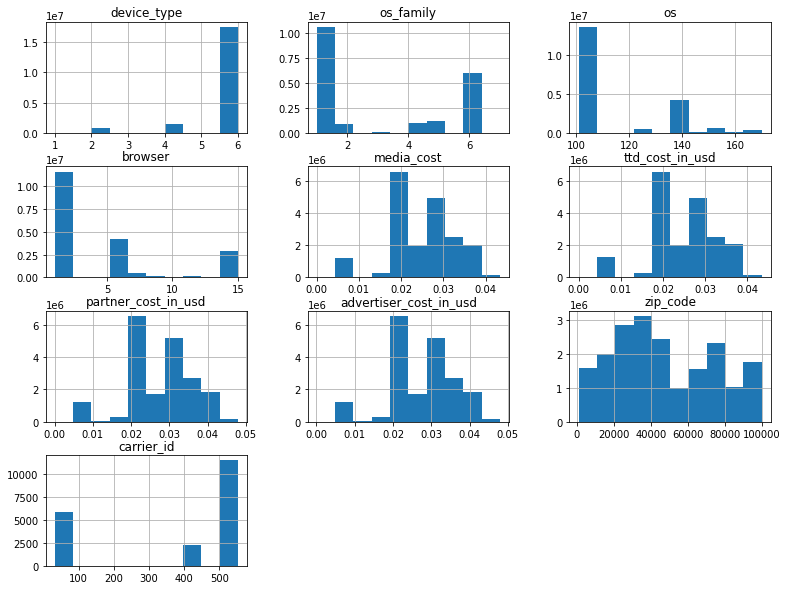

In [11]:
# Histograms
import matplotlib.pyplot as plt

impressions.hist(figsize=(13,10))
plt.show()

In [12]:
# campaign
print(impressions['campaign_id'].value_counts())
print()
# ad group
print(impressions['ad_group_id'].value_counts())
print()
# audience
print(impressions['audience_id'].value_counts())

pey7wjw    11377481
el02c6n     3862165
37mbq70     1235859
3ifg9qs     1022959
1lbe4rr      865995
883mie9      520898
tewk8co      501171
n9cyl1d      174962
3caat14      138752
gw0dn2q          12
qeypp4q           2
Name: campaign_id, dtype: int64

exazlvq    3862165
p64hhnx    2754108
ocgz9ox    2501390
fcucjsu    1831632
jrs3low    1542122
l16k4pm    1518660
985jsza    1235859
t81fv65    1229569
lc5e1vp     865995
i3lc0ui     501171
imqkod7     302406
4wwjlor     259591
kt0y5a0     256986
zwn8sxi     229808
bjlvnqj     206713
v794d98     174962
07qnswp     130140
zw22joi     113947
9xgkc15      84377
oevx1xt      73836
z75aty0      23014
b6h8bwy       1791
zdqxp2a         12
bzmf4lw          2
Name: ad_group_id, dtype: int64

8w5d7xz    2754108
1qh4zg7    1831632
ovwdyib    1542122
k7orynn    1235859
vshk6qb     143537
oodakbi     136964
sr1mel0      73836
wluvyy2      20442
3obyxao       2214
lfifv2d       1615
9dob8vr        502
Name: audience_id, dtype: int64


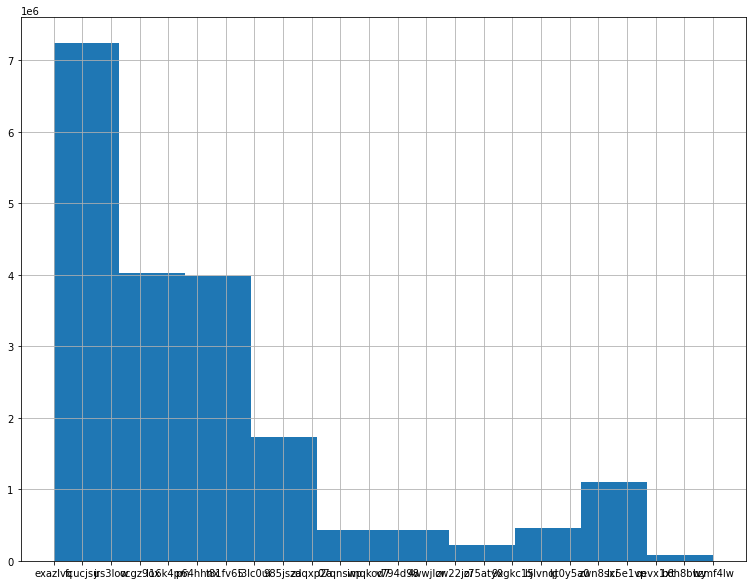

In [13]:
# One campaign (from A Media Service Company); Four ad group assigned by TTD; One audience 
impressions['ad_group_id'].hist(figsize=(13,10))
plt.show()

freewheel       7931892
Telaria         7708414
spotx           1800217
triplelift       948543
google           529813
adswizz          501185
kargo             62056
yieldmo           45429
teadstv           40834
taboola           37094
sharethrough      33838
outbrain          28654
smaato            23534
appnexus           5665
nativo             2869
richaudience        202
seedtag              14
aja                   2
ucfunnel              1
Name: supply_vendor, dtype: int64


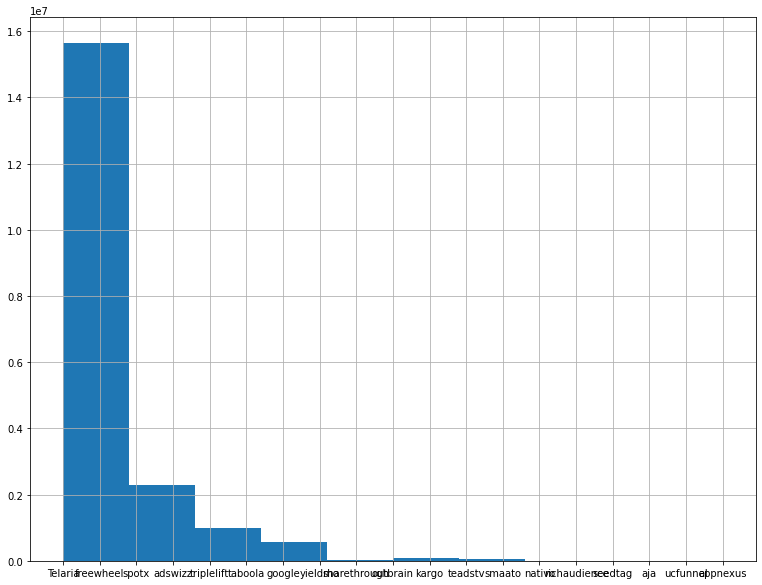

In [14]:
# supply vendor (from which the impression was purchased)
print(impressions['supply_vendor'].value_counts())
impressions['supply_vendor'].hist(figsize=(13,10))
plt.show()

In [15]:
# user agent
print(impressions['user_agent'].value_counts())

Roku/DVP-9.30 (519.30E04194A)                                                                                                                                                                              1167140
Roku/DVP-9.30 (AE9.30E04194A)                                                                                                                                                                               987404
Mozilla/5.0 (Linux; Android 5.1.1; AFTT Build/LVY48F; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/75.0.3770.143 Mobile Safari/537.36                                                      949376
Dalvik/2.1.0 (Linux; U; Android 5.1.1; AFTT Build/LVY48F) CTV                                                                                                                                               768015
Roku/DVP-9.30 (309.30E04194A)                                                                                                                               

In [16]:
impressions['zip_code'].value_counts()

36117.0    18317
20149.0    17493
65203.0    15266
37042.0    13578
63033.0    13285
           ...  
12416.0        1
12411.0        1
32445.0        1
32443.0        1
16917.0        1
Name: zip_code, Length: 28825, dtype: int64

In [17]:
# region (state)
impressions['region'].value_counts()

Texas                   1462957
California              1187212
New York                1179176
Florida                 1101418
Ohio                    1047464
Georgia                  880215
North Carolina           787128
Illinois                 760827
Pennsylvania             720941
Tennessee                697634
Virginia                 604062
Michigan                 573060
Indiana                  541873
Missouri                 498777
Alabama                  496168
South Carolina           489775
New Jersey               476670
Maryland                 436816
Kentucky                 421323
Louisiana                409693
Wisconsin                333518
Washington               329317
Massachusetts            328152
Mississippi              321783
Minnesota                310913
Arkansas                 262742
Connecticut              246818
Oklahoma                 239546
Arizona                  238884
Colorado                 226126
Oregon                   225054
Kansas  

In [18]:
# city
impressions['city'].value_counts()
# bias between the city population with the people reached here

Chicago             201678
Houston             136554
Brooklyn            134884
Philadelphia        132711
Columbus            119443
                     ...  
Drakesville              1
Bienville                1
Huntington Mills         1
New Vernon               1
Linn Creek               1
Name: city, Length: 14665, dtype: int64

1.0    10501625
6.0     6002524
5.0     1180607
4.0     1008757
2.0      863232
3.0      129869
7.0          70
Name: os_family, dtype: int64


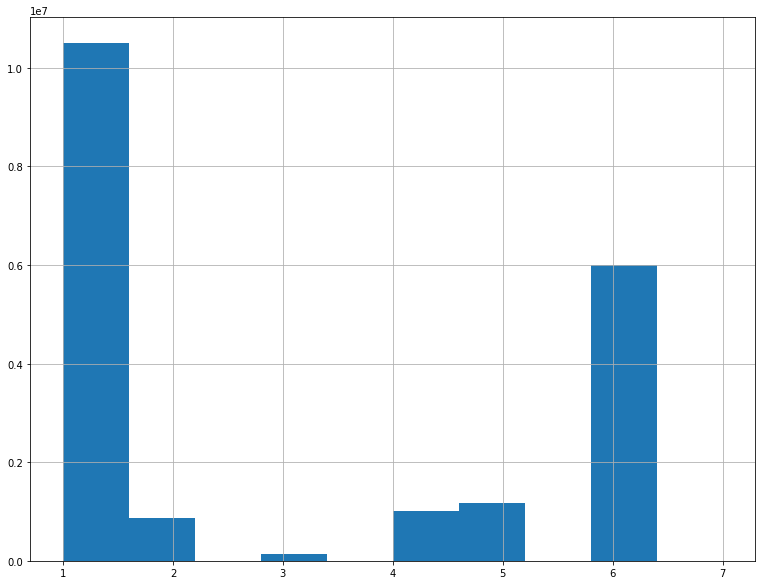

In [19]:
# os family
print(impressions['os_family'].value_counts())
impressions['os_family'].hist(figsize=(13,10))
plt.show()

101.0    13428661
141.0     2927080
140.0     1208093
122.0      536082
156.0      340470
155.0      249160
164.0      184137
170.0      165288
145.0      163007
163.0       66273
136.0       58432
104.0       46114
169.0       45995
111.0       40135
154.0       38005
139.0       30721
162.0       29849
132.0       27575
157.0       24841
112.0       16834
105.0       16260
168.0       14113
161.0        9631
144.0        2494
137.0        1705
153.0        1651
160.0        1638
151.0        1587
159.0        1549
109.0        1328
102.0        1114
158.0        1104
103.0        1019
152.0         742
148.0         736
149.0         562
107.0         496
150.0         396
117.0         297
143.0         245
147.0         241
146.0         232
116.0         138
142.0         128
134.0          83
138.0          83
115.0          79
131.0          67
135.0          42
121.0          30
108.0          30
129.0          30
110.0          27
113.0          21
133.0          15
130.0     

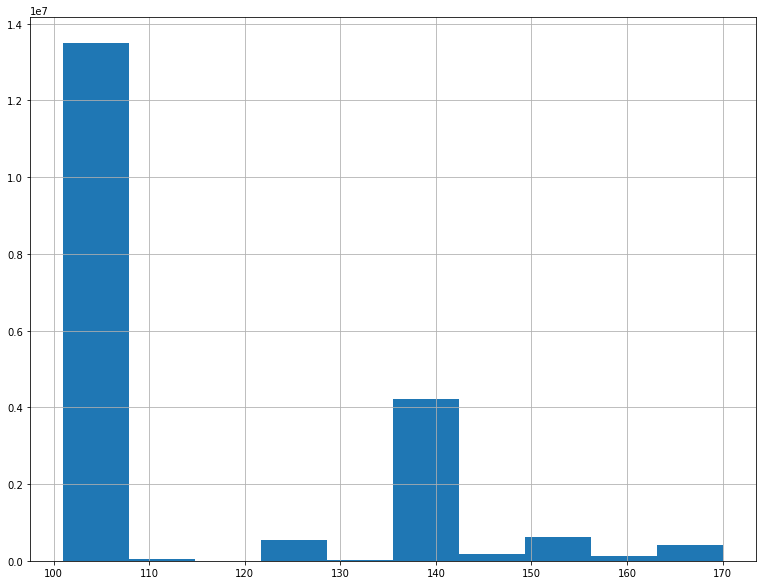

In [20]:
# os
print(impressions['os'].value_counts())
impressions['os'].hist(figsize=(13,10))
plt.show()

1.0     11619141
6.0      4252715
15.0     2878704
7.0       531504
12.0      171882
9.0       145948
10.0       65585
5.0         8916
4.0         6634
8.0         5515
3.0          102
14.0          38
Name: browser, dtype: int64


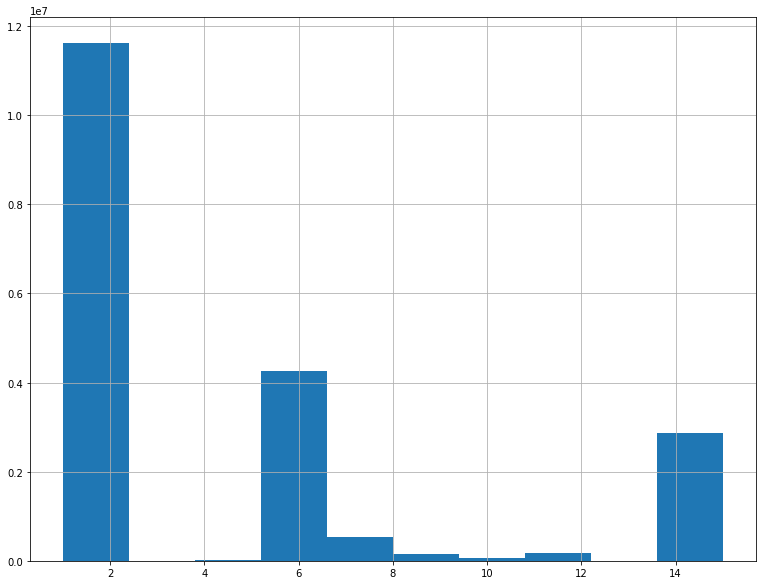

In [21]:
# browser
print(impressions['browser'].value_counts())
impressions['browser'].hist(figsize=(13,10))
plt.show()

In [22]:
#zip code
impressions['zip_code'].value_counts()
# closely associated with city, region, longitude, latitude

36117.0    18317
20149.0    17493
65203.0    15266
37042.0    13578
63033.0    13285
           ...  
12416.0        1
12411.0        1
32445.0        1
32443.0        1
16917.0        1
Name: zip_code, Length: 28825, dtype: int64

In [23]:
# device model
impressions['device_model'].value_counts()

Digital Video player       9322469
Fire TV Stick (2nd Gen)    2788932
Chromecast                  885673
AFTMM                       885664
iPhone                      475955
                            ...   
WAS-LX1                          1
RMX2063                          1
1                                1
SM-N981N                         1
C740                             1
Name: device_model, Length: 3514, dtype: int64

6    17342366
4     1505434
2      797180
3       47923
1        7353
Name: device_type, dtype: int64


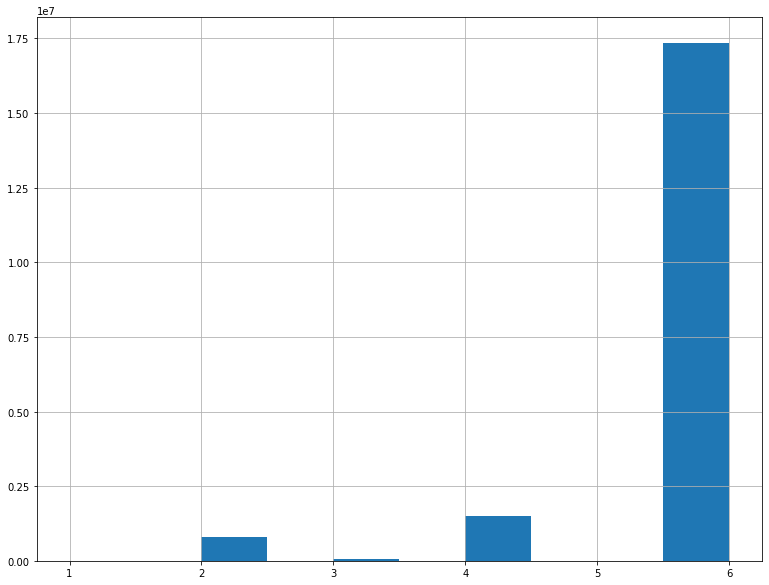

In [24]:
# device type
print(impressions['device_type'].value_counts())
impressions['device_type'].hist(figsize=(13,10))
plt.show()